In [23]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import numpy as np

## Generator

In [24]:
generator = Sequential()
generator.add(Dense(256, input_shape=(100,)))
generator.add(LeakyReLU(alpha = 0.2))
generator.add(BatchNormalization(momentum =0.8))
generator.add(Dense(512))
generator.add(LeakyReLU(alpha = 0.2))
generator.add(BatchNormalization(momentum = 0.8))
generator.add(Dense(1024))
generator.add(LeakyReLU(alpha = 0.2))
generator.add(BatchNormalization(momentum = 0.8))
generator.add(Dense(784, activation = 'tanh'))
generator.add(Reshape((28, 28)))

optimizer = keras.optimizers.Adam(lr = 0.0002, decay = 8e-9)

generator.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

c:\Users\mukes\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## Discriminator

In [25]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape = (28, 28)))
discriminator.add(Dense(784))

discriminator.add(LeakyReLU(alpha = 0.2))
discriminator.add(Dense(784//2))
discriminator.add(LeakyReLU(alpha = 0.2))

discriminator.add(Dense(1, activation = 'sigmoid'))

discriminator.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])

In [26]:
discriminator.trainable = False
adversarial = Sequential()
adversarial.add(generator)
adversarial.add(discriminator)
adversarial.compile(loss = 'binary_crossentropy', optimizer = optimizer)

## Loading dataset

In [27]:
(X_train, _), (_, _) = keras.datasets.mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5

## Network training

In [28]:
def plotn(n):
    noise = np.random.normal(0, 1, (n, 100))
    imgs = generator.predict(noise)
    fig, ax = plt.subplots(1, n)
    for i, im in enumerate(imgs):
        ax[i].imshow(im.reshape(28, 28))
    plt.show()

1/1 [==============================] - 0s 96ms/step
epoch: 0, [Discriminator :: d_loss: 0.899291], [ Generator :: loss: 0.680008]
1/1 [==============================] - 0s 16ms/step


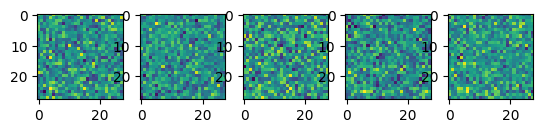

1/1 [==============================] - 0s 16ms/step
epoch: 500, [Discriminator :: d_loss: 0.072298], [ Generator :: loss: 4.652458]
1/1 [==============================] - 0s 17ms/step


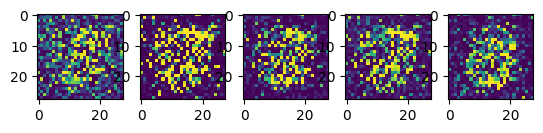

1/1 [==============================] - 0s 16ms/step
epoch: 1000, [Discriminator :: d_loss: 0.139459], [ Generator :: loss: 4.383720]
1/1 [==============================] - 0s 18ms/step


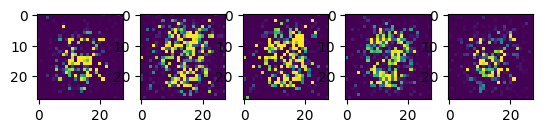

1/1 [==============================] - 0s 17ms/step
epoch: 1500, [Discriminator :: d_loss: 0.272382], [ Generator :: loss: 2.567392]
1/1 [==============================] - 0s 18ms/step


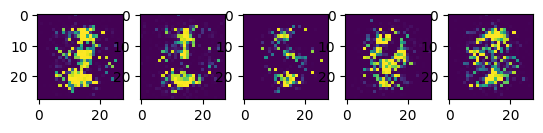

1/1 [==============================] - 0s 17ms/step
epoch: 2000, [Discriminator :: d_loss: 0.306985], [ Generator :: loss: 2.541128]
1/1 [==============================] - 0s 16ms/step


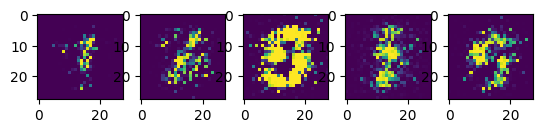

1/1 [==============================] - 0s 17ms/step
epoch: 2500, [Discriminator :: d_loss: 0.538402], [ Generator :: loss: 1.439287]
1/1 [==============================] - 0s 16ms/step


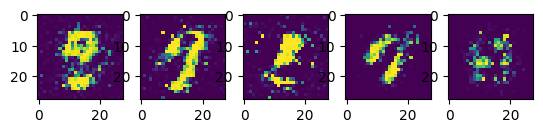

1/1 [==============================] - 0s 16ms/step


In [29]:
batch=32
for cnt in range(3000):
## train discriminator
  random_index =  np.random.randint(0, len(X_train) - batch//2)
  legit_images = X_train[random_index : random_index + batch//2].reshape(batch//2, 28, 28)
  gen_noise = np.random.normal(0, 1, (batch//2,100))
  syntetic_images = generator.predict(gen_noise)
  x_combined_batch = np.concatenate((legit_images, syntetic_images))
  y_combined_batch = np.concatenate((np.ones((batch//2, 1)), np.zeros((batch//2, 1))))
  d_loss = discriminator.train_on_batch(x_combined_batch, y_combined_batch)
# train generator
  noise = np.random.normal(0, 1, (batch,100))
  y_mislabled = np.ones((batch, 1))
  g_loss = adversarial.train_on_batch(noise, y_mislabled)
  if cnt%500==0:
    print ('epoch: %d, [Discriminator :: d_loss: %f], [ Generator :: loss: %f]' % (cnt, d_loss[0], g_loss))
    plotn(5)
